In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [12]:
df= pd.read_csv("bank.csv")

In [13]:
df.head()

,age,job,marital,education,default,balance,housing-loan,personal-loan,current-campaign,previous-campaign,subscribed
0,30,unemployed,married,primary,no,1787,no,no,1,0,no
1,33,services,married,secondary,no,4789,yes,yes,1,4,no
2,35,management,single,tertiary,no,1350,yes,no,1,1,no
3,30,management,married,tertiary,no,1476,yes,yes,4,0,no
4,59,blue-collar,married,secondary,no,0,yes,no,1,0,no


In [14]:
df.describe()

,age,balance,current-campaign,previous-campaign
count,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,2.793630,0.542579
std,10.576211,3009.638142,3.109807,1.693562
min,19.000000,-3313.000000,1.000000,0.000000
25%,33.000000,69.000000,1.000000,0.000000
50%,39.000000,444.000000,2.000000,0.000000
75%,49.000000,1480.000000,3.000000,0.000000
max,87.000000,71188.000000,50.000000,25.000000


In [15]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 11 columns):
age                  4521 non-null int64
job                  4521 non-null object
marital              4521 non-null object
education            4521 non-null object
default              4521 non-null object
balance              4521 non-null int64
housing-loan         4521 non-null object
personal-loan        4521 non-null object
current-campaign     4521 non-null int64
previous-campaign    4521 non-null int64
subscribed           4521 non-null object
dtypes: int64(4), object(7)
memory usage: 388.6+ KB


In [17]:
df= df.replace('unknown',np.nan)

In [19]:
total_null=df.isna().sum()
total_null
total = len(df)
total
missing = total_null/total
missing

age                  0.000000
job                  0.008405
marital              0.000000
education            0.041363
default              0.000000
balance              0.000000
housing-loan         0.000000
personal-loan        0.000000
current-campaign     0.000000
previous-campaign    0.000000
subscribed           0.000000
dtype: float64

In [20]:
df=df.dropna()


In [21]:
df.isna().sum()

age                  0
job                  0
marital              0
education            0
default              0
balance              0
housing-loan         0
personal-loan        0
current-campaign     0
previous-campaign    0
subscribed           0
dtype: int64

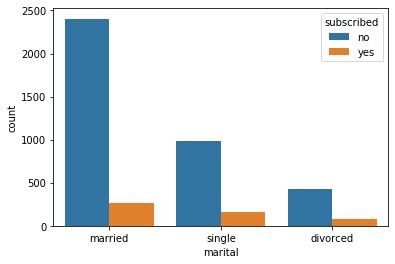

In [23]:
sns.countplot(x='marital',hue='subscribed',data=df)

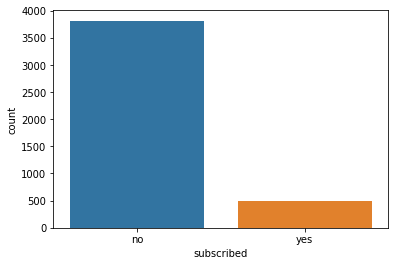

In [24]:
sns.countplot(x='subscribed',data=df)

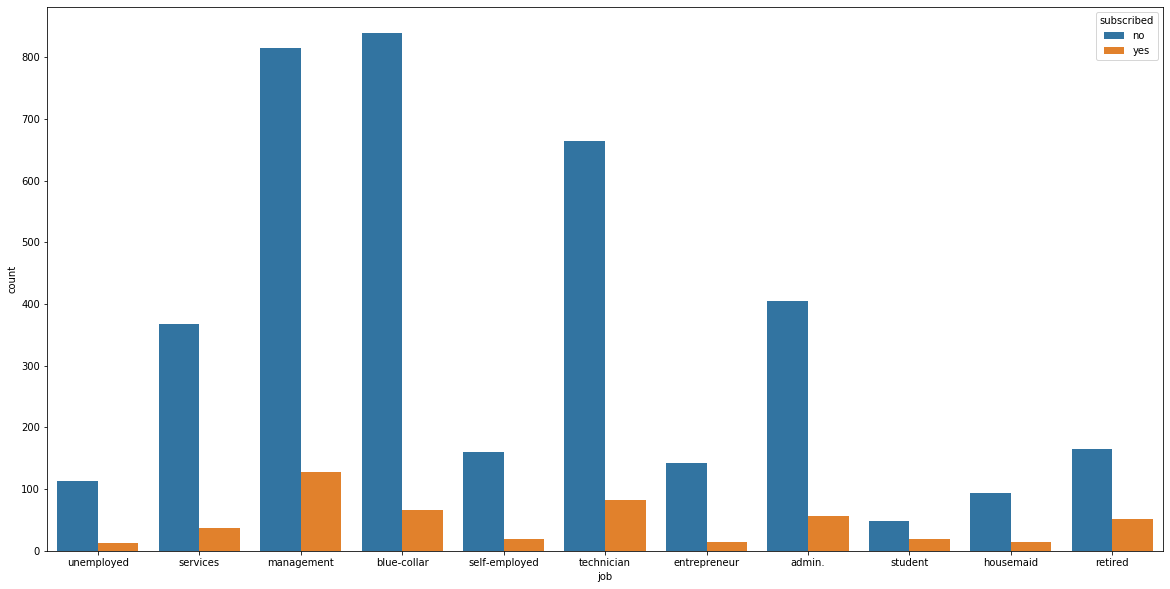

In [25]:
plt.figure(figsize=(20,10))
sns.countplot(x='job',hue='subscribed',data=df)

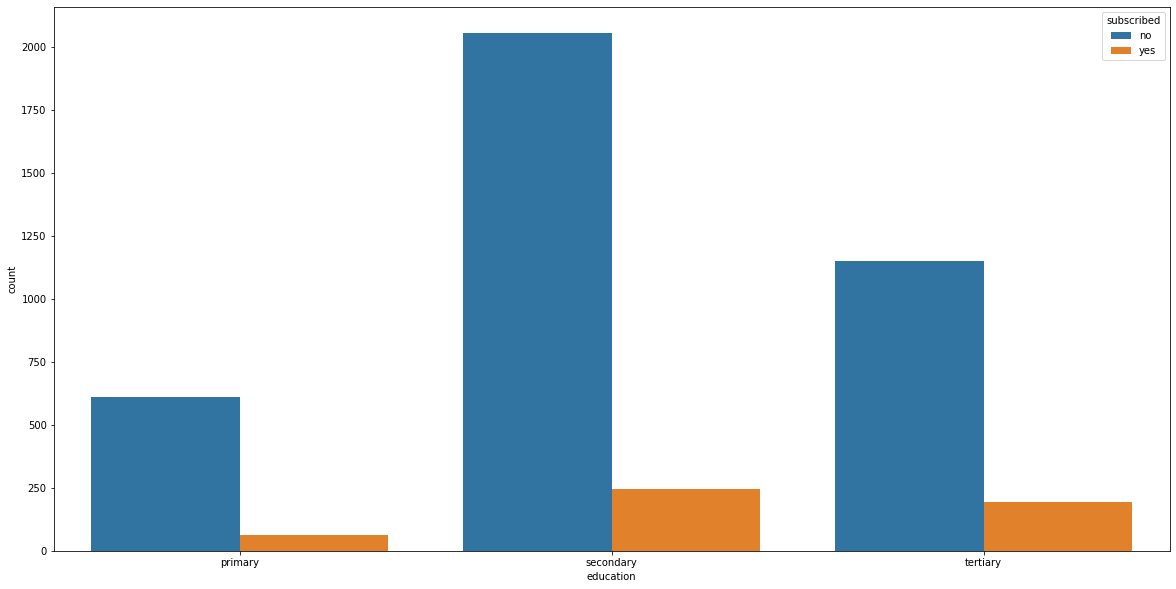

In [26]:
plt.figure(figsize=(20,10))
sns.countplot(x='education',hue='subscribed',data=df)

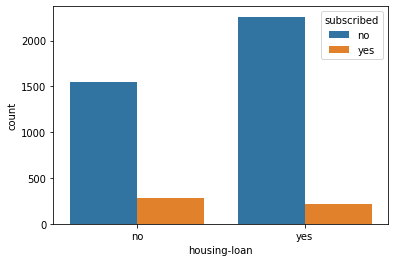

In [27]:
sns.countplot(x='housing-loan',hue='subscribed',data=df)

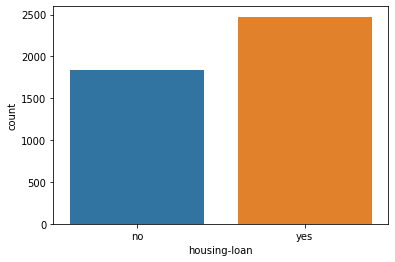

In [28]:
sns.countplot(x='housing-loan',data=df)

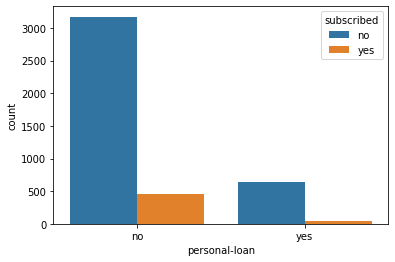

In [29]:
sns.countplot(x='personal-loan',hue='subscribed',data=df)

In [31]:
a_df= pd.DataFrame()
a_df['age_yes'] = (df[df['subscribed']=='yes'][['subscribed','age']].describe())['age']
a_df['age_no'] = (df[df['subscribed']=='no'][['subscribed','age']].describe())['age']
a_df

,age_yes,age_no
count,498.000000,3813.000000
mean,42.110442,40.821400
std,13.122923,10.100146
min,19.000000,20.000000
25%,32.000000,33.000000
50%,39.000000,39.000000
75%,49.750000,48.000000
max,87.000000,86.000000


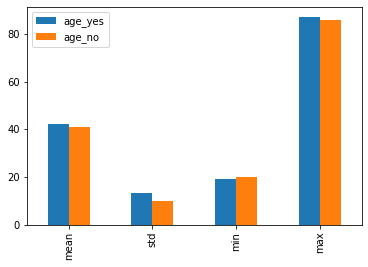

In [32]:
a_df.drop(['25%','50%','75%','count']).plot.bar()

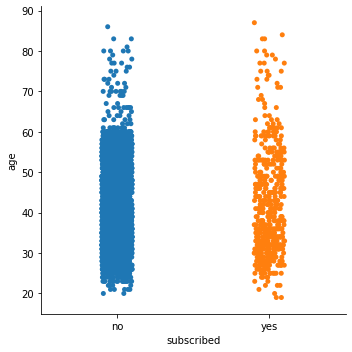

In [33]:
sns.catplot(x="subscribed", y="age",data=df)

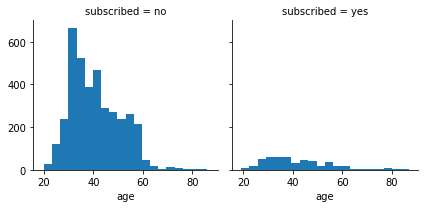

In [42]:
g = sns.FacetGrid(data = df,col= 'subscribed')
g.map(plt.hist,'age',bins = 20)

In [44]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [45]:
df=df.apply(LabelEncoder().fit_transform)


In [46]:
df['AgeBand'] = pd.cut(df['age'], 5)
df[['AgeBand', 'subscribed']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,subscribed
0,"(-0.066, 13.2]",0.130859
1,"(13.2, 26.4]",0.097179
2,"(26.4, 39.6]",0.099913
3,"(39.6, 52.8]",0.244318
4,"(52.8, 66.0]",0.434783


In [47]:
df.loc[ df['age'] <= 16, 'age'] = 0
df.loc[(df['age'] > 16) & (df['age'] <= 32), 'age'] = 1
df.loc[(df['age'] > 32) & (df['age'] <= 48), 'age'] = 2
df.loc[(df['age'] > 48) & (df['age'] <= 64), 'age'] = 3
df.loc[ df['age'] > 64, 'age']

1866    65
3311    66
Name: age, dtype: int64

In [48]:
df=df.drop('AgeBand',axis=1)

In [49]:
df['balance'].describe()

count    4311.000000
mean      875.807005
std       615.129728
min         0.000000
25%       336.500000
50%       689.000000
75%      1329.500000
max      2281.000000
Name: balance, dtype: float64

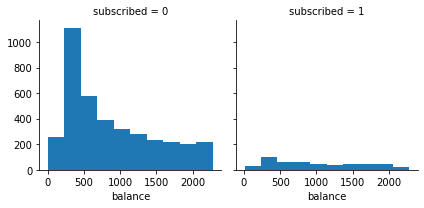

In [51]:
g = sns.FacetGrid(data = df,col= 'subscribed')
g.map(plt.hist,'balance')

In [52]:
df['BalanceBand'] = pd.cut(df['balance'], 5)
df[['BalanceBand', 'subscribed']].groupby(['BalanceBand'], as_index=False).mean().sort_values(by='BalanceBand', ascending=True)



,BalanceBand,subscribed
0,"(-2.281, 456.2]",0.086609
1,"(456.2, 912.4]",0.113843
2,"(912.4, 1368.6]",0.125364
3,"(1368.6, 1824.8]",0.164207
4,"(1824.8, 2281.0]",0.140496


In [53]:
df.loc[ df['balance'] <= 450, 'balance'] = 0
df.loc[(df['balance'] > 450) & (df['balance'] <= 910), 'balance'] = 1
df.loc[(df['balance'] > 910) & (df['balance'] <= 1370), 'balance'] = 2
df.loc[(df['balance'] > 1370) & (df['balance'] <= 1820), 'balance'] = 3
df.loc[ df['balance'] > 1820 , 'balance']=4

In [54]:
df=df.drop('BalanceBand',axis=1)

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X=df.drop(['subscribed'],axis=1)
y=df['subscribed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [57]:
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)

(2586, 10)
(1725, 10)
(1725,)


# KNN

In [58]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [59]:
acc_knn = round(knn.score(X_train,y_train)*100,2)
acc_knn

89.13

In [60]:
KNN_pred = knn.predict(X_test)
from sklearn.metrics import mean_squared_error
knn_mse = mean_squared_error(y_test,KNN_pred)
knn_mse

0.12231884057971014

In [79]:
results = confusion_matrix(y_test, KNN_pred) 
  
print ('Confusion Matrix :')
print(results) 
print ('Accuracy Score :',accuracy_score(y_test, KNN_pred)) 
print ('Report : ')
print (classification_report(y_test, KNN_pred))

Confusion Matrix :
[[1506   38]
 [ 173    8]]
Accuracy Score : 0.8776811594202899
Report : 
              precision    recall  f1-score   support

           0       0.90      0.98      0.93      1544
           1       0.17      0.04      0.07       181

    accuracy                           0.88      1725
   macro avg       0.54      0.51      0.50      1725
weighted avg       0.82      0.88      0.84      1725



# Decision Trees

In [61]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [62]:
acc_decision_tree = round(tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

97.02

In [77]:
tree_pred=tree.predict(X_test)
from sklearn.metrics import mean_squared_error
tree_mse = mean_squared_error(y_test,tree_pred)
tree_mse

0.17449275362318842

In [78]:
results = confusion_matrix(y_test, tree_pred) 
  
print ('Confusion Matrix :')
print(results) 
print ('Accuracy Score :',accuracy_score(y_test, tree_pred)) 
print ('Report : ')
print (classification_report(y_test, tree_pred))

Confusion Matrix :
[[1386  158]
 [ 143   38]]
Accuracy Score : 0.8255072463768116
Report : 
              precision    recall  f1-score   support

           0       0.91      0.90      0.90      1544
           1       0.19      0.21      0.20       181

    accuracy                           0.83      1725
   macro avg       0.55      0.55      0.55      1725
weighted avg       0.83      0.83      0.83      1725



# Logistic Regression

In [65]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)


C:\Users\Raghav\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [66]:
regression_accuracy = round(lr.score(X_train,y_train)*100,2)
regression_accuracy

87.7

In [67]:
regression_pred=lr.predict(X_test)
from sklearn.metrics import mean_squared_error
lr_mse = mean_squared_error(y_test,regression_pred)
lr_mse

0.10608695652173913

In [76]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
  
results = confusion_matrix(y_test, regression_pred) 
  
print ('Confusion Matrix :')
print(results) 
print ('Accuracy Score :',accuracy_score(y_test, regression_pred)) 
print ('Report : ')
print (classification_report(y_test, regression_pred))

Confusion Matrix :
[[1540    4]
 [ 179    2]]
Accuracy Score : 0.8939130434782608
Report : 
              precision    recall  f1-score   support

           0       0.90      1.00      0.94      1544
           1       0.33      0.01      0.02       181

    accuracy                           0.89      1725
   macro avg       0.61      0.50      0.48      1725
weighted avg       0.84      0.89      0.85      1725



In [74]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Decision Tree'],
    'Score': [acc_knn, regression_accuracy, acc_decision_tree],
     'MSE':[knn_mse,lr_mse,tree_mse]})
models.sort_values(by='Score', ascending=False)

,Model,Score,MSE
2,Decision Tree,97.02,0.174493
0,KNN,89.13,0.122319
1,Logistic Regression,87.70,0.106087
